# Exploração BRICS World Bank Indicators

**Importação de bibliotecas**

In [41]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
from IPython.display import HTML, Markdown, display
import numpy as np
from sklearn import model_selection as ms
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2


**Carregamento dos datasets originais**

In [42]:
eco = pd.read_csv("data/Economy_Data.csv", sep=";")
private = pd.read_csv("data/PrivateSector_Data.csv", sep=";")
public = pd.read_csv("data/PublicSector_Indicators.csv", sep=";")
health = pd.read_csv("data/HealthAndPoverty_Data.csv", sep=";")
edu = pd.read_csv("data/EducationAndEnviron_Data.csv", sep=";")

## Estruturação do dataframe
___

- Concatenação dos datasets em uma dataframe único

In [43]:
df = pd.concat([eco, private, public, health, edu]).dropna()
df

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
5,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,Brazil,BRA,1970.0,3.918974e+11
7,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,India,IND,1970.0,1.915335e+11
10,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,Brazil,BRA,1970.0,3.786021e+10
11,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,China,CHN,1970.0,8.525561e+10
12,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,India,IND,1970.0,5.776720e+10
...,...,...,...,...,...,...
71480,Urban population growth (annual %),SP.URB.GROW,Brazil,BRA,2019.0,1.045678e+00
71481,Urban population growth (annual %),SP.URB.GROW,China,CHN,2019.0,2.292727e+00
71482,Urban population growth (annual %),SP.URB.GROW,India,IND,2019.0,2.305597e+00
71483,Urban population growth (annual %),SP.URB.GROW,Russian Federation,RUS,2019.0,1.344493e-01


- Seleção dos dados da `China`

In [44]:
df = df[:][df["CountryCode"] == "CHN"]

- Contagem das instâncias de informações (nº de registros)

In [45]:
counts = df["SeriesName"].value_counts()
counts

Population ages 60-64, female (% of female population)                                                                        50
Population in urban agglomerations of more than 1 million                                                                     50
Exports of goods and services (current US$)                                                                                   50
Population ages 15-64, female                                                                                                 50
Rural population                                                                                                              50
                                                                                                                              ..
Power outages in firms in a typical month (number)                                                                             1
Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)

- Identificação das informações mais completas (com dados referentes aos 50 anos de registro)

In [46]:
filtered_info = counts[:][counts >= 50]
filtered_info.shape

(126,)

- Seleção das informações e Remoção de informações duplicadas

In [47]:
df = df[:][df["SeriesName"].isin(list(filtered_info.keys()))].drop_duplicates()
df

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
141,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,China,CHN,1970.0,3.479844e+01
146,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.KD.ZG,China,CHN,1970.0,7.700000e+00
151,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.KD,China,CHN,1970.0,1.248314e+11
156,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.KN,China,CHN,1970.0,1.040250e+12
161,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.CN,China,CHN,1970.0,7.933000e+10
...,...,...,...,...,...,...
71156,Rural population growth (annual %),SP.RUR.TOTL.ZG,China,CHN,2019.0,-2.513529e+00
71286,"Secondary education, duration (years)",SE.SEC.DURS,China,CHN,2019.0,6.000000e+00
71471,Urban population,SP.URB.TOTL,China,CHN,2019.0,8.429340e+08
71476,Urban population (% of total population),SP.URB.TOTL.IN.ZS,China,CHN,2019.0,6.030800e+01


- *Reshape* da dataframe baseado em `Year`, `SeriesName` e `Value`

In [48]:
df_meas = df.pivot(index="Year", columns="SeriesName", values="Value")
df_meas

SeriesName,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (annual % growth)","Agriculture, forestry, and fishing, value added (constant 2010 US$)","Agriculture, forestry, and fishing, value added (constant LCU)","Agriculture, forestry, and fishing, value added (current LCU)","Agriculture, forestry, and fishing, value added (current US$)",Arms exports (SIPRI trend indicator values),...,Rural population,Rural population (% of total population),Rural population growth (annual %),"Secondary education, duration (years)","Services, value added (% of GDP)","Services, value added (current LCU)",Trade (% of GDP),Urban population,Urban population (% of total population),Urban population growth (annual %)
Year,,,,,,,,,,,,,,,,,,,,,
1970.0,79.067857,6.711511,72.356346,34.798438,7.700000,1.248314e+11,1.040250e+12,7.933000e+10,3.222439e+10,8.930000e+08,...,675928190.0,82.600,2.916759,4.0,24.928719,5.683000e+10,4.952406,142386810.0,17.400,2.028736
1971.0,79.343397,6.844092,72.499305,33.631812,1.900000,1.272031e+11,1.060015e+12,8.263000e+10,3.356487e+10,1.292000e+09,...,695661123.0,82.708,2.877581,4.0,24.445439,6.006000e+10,4.920835,145443877.0,17.292,2.124292
1972.0,79.485458,6.965496,72.519962,32.416549,-0.900000,1.260583e+11,1.050475e+12,8.274000e+10,3.685359e+10,1.238000e+09,...,713898765.0,82.816,2.587852,4.0,24.811942,6.333000e+10,5.755367,148131235.0,17.184,1.830832
1973.0,79.486645,7.078791,72.407855,32.925767,9.000000,1.374036e+11,1.145017e+12,9.075000e+10,4.561677e+10,6.740000e+08,...,730387430.0,82.816,2.283395,4.0,24.250780,6.684000e+10,8.000145,151552570.0,17.184,2.283396
1974.0,79.153557,7.184947,71.968610,33.426460,4.100000,1.430371e+11,1.191963e+12,9.452000e+10,4.819498e+10,5.110000e+08,...,744661478.0,82.708,1.935460,4.0,24.143297,6.827000e+10,10.333487,155688522.0,17.292,2.692480
1975.0,78.335005,7.284008,71.050997,31.952624,2.000000,1.458979e+11,1.215802e+12,9.712000e+10,5.222067e+10,6.680000e+08,...,756942270.0,82.600,1.635727,4.0,22.687942,6.896000e+10,9.554203,159452730.0,17.400,2.389016
1976.0,76.933619,7.425673,69.507946,32.359633,-1.800000,1.432717e+11,1.193918e+12,9.671000e+10,4.981457e+10,5.860000e+08,...,768187399.0,82.540,1.474672,4.0,22.605902,6.756000e+10,8.836914,162497601.0,17.460,1.891572
1977.0,75.208477,7.554590,67.653887,28.990769,-2.200000,1.401197e+11,1.167652e+12,9.422000e+10,5.071590e+10,2.240000e+08,...,778161684.0,82.480,1.290061,5.0,24.310769,7.901000e+10,8.384615,165293316.0,17.520,1.705833
1978.0,73.157321,7.671250,65.486071,27.685418,-1.120491,1.385497e+11,1.154568e+12,1.018464e+11,4.140098e+10,6.170000e+08,...,785011465.0,82.100,0.876400,6.0,24.603171,9.050775e+10,9.650142,171153535.0,17.900,3.483945


## Seleção de *features*
___

### Verificação da Correlação

- Seleção de algumas colunas (removendo colunas de nomes similares)

In [49]:
nomes = list(df_meas.keys())
escolhidos = []
escolhidos_tmp = []

for nome in nomes:
    subnomes = "_".join(nome.split(" ")[0:2])
    if subnomes not in escolhidos_tmp:
        escolhidos_tmp.append(subnomes)
        escolhidos.append(nome)
print(escolhidos)

['Age dependency ratio (% of working-age population)', 'Agriculture, forestry, and fishing, value added (% of GDP)', 'Arms exports (SIPRI trend indicator values)', 'Arms imports (SIPRI trend indicator values)', 'Exports of goods and services (% of GDP)', 'External balance on goods and services (% of GDP)', 'GDP (constant 2010 US$)', 'GDP (current LCU)', 'GDP growth (annual %)', 'GDP per capita (constant 2010 US$)', 'GNI (current LCU)', 'GNI per capita (current LCU)', 'GNI, Atlas method (current US$)', 'Imports of goods and services (% of GDP)', 'Industry (including construction), value added (% of GDP)', 'Lower secondary school starting age (years)', 'Merchandise exports (current US$)', 'Merchandise imports (current US$)', 'Merchandise trade (% of GDP)', 'Mortality rate, infant (per 1,000 live births)', 'Number of infant deaths', 'Population ages 0-14 (% of total population)', 'Population growth (annual %)', 'Population in largest city', 'Population, female', 'Population, male', 'Popul

- Visualização da correlação de algumas colunas

In [50]:
df_meas2 = df_meas[escolhidos]

cm = sns.color_palette("coolwarm", as_cmap=True)
corr = df_meas2.corr()
corr.style.background_gradient(cmap=cm)

SeriesName,Age dependency ratio (% of working-age population),"Agriculture, forestry, and fishing, value added (% of GDP)",Arms exports (SIPRI trend indicator values),Arms imports (SIPRI trend indicator values),Exports of goods and services (% of GDP),External balance on goods and services (% of GDP),GDP (constant 2010 US$),GDP (current LCU),GDP growth (annual %),GDP per capita (constant 2010 US$),GNI (current LCU),GNI per capita (current LCU),"GNI, Atlas method (current US$)",Imports of goods and services (% of GDP),"Industry (including construction), value added (% of GDP)",Lower secondary school starting age (years),Merchandise exports (current US$),Merchandise imports (current US$),Merchandise trade (% of GDP),"Mortality rate, infant (per 1,000 live births)",Number of infant deaths,Population ages 0-14 (% of total population),Population growth (annual %),Population in largest city,"Population, female","Population, male","Population, total","Primary education, duration (years)",Primary school starting age (years),Rural population,"Secondary education, duration (years)","Services, value added (% of GDP)",Trade (% of GDP),Urban population
SeriesName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Age dependency ratio (% of working-age population),1.000000,0.928025,-0.174035,-0.707931,-0.910642,-0.575499,-0.716252,-0.635679,-0.180956,-0.727618,-0.635367,-0.646795,-0.604581,-0.931431,-0.049150,nan,-0.683628,-0.688297,-0.901108,0.949090,0.926785,0.986744,0.895253,-0.851058,-0.974857,-0.975151,-0.975014,-0.698895,0.698895,0.303732,-0.758960,-0.891398,-0.925002,-0.882589
"Agriculture, forestry, and fishing, value added (% of GDP)",0.928025,1.000000,-0.055530,-0.749164,-0.881128,-0.591940,-0.847402,-0.779900,-0.060200,-0.856029,-0.779547,-0.789547,-0.747410,-0.889803,-0.020803,nan,-0.811274,-0.813284,-0.818843,0.940919,0.908040,0.964457,0.900867,-0.953488,-0.973942,-0.974718,-0.974347,-0.794569,0.794569,0.523736,-0.570813,-0.968533,-0.889862,-0.962799
Arms exports (SIPRI trend indicator values),-0.174035,-0.055530,1.000000,-0.309000,-0.069287,-0.248635,0.307325,0.340330,0.094586,0.304373,0.340078,0.336351,0.376564,-0.004085,-0.471628,nan,0.335456,0.329163,-0.052564,-0.202319,-0.094897,-0.187443,-0.008635,0.187374,0.115462,0.115800,0.115637,0.206918,-0.206918,-0.303036,0.186304,0.171469,-0.040253,0.202663
Arms imports (SIPRI trend indicator values),-0.707931,-0.749164,-0.309000,1.000000,0.828469,0.592704,0.435505,0.344386,0.159301,0.446072,0.343898,0.355199,0.297655,0.824843,0.226863,nan,0.382921,0.390992,0.795198,-0.645215,-0.663513,-0.703547,-0.688923,0.630721,0.719459,0.719935,0.719708,0.510886,-0.510886,-0.173093,0.403933,0.672989,0.831366,0.632729
Exports of goods and services (% of GDP),-0.910642,-0.881128,-0.069287,0.828469,1.000000,0.769274,0.595694,0.496457,0.229666,0.609175,0.496361,0.510568,0.450771,0.978065,0.263952,nan,0.586415,0.593386,0.966686,-0.841109,-0.832873,-0.898511,-0.829947,0.776790,0.882566,0.884244,0.883434,0.723478,-0.723478,-0.264482,0.579761,0.792254,0.995575,0.795756
External balance on goods and services (% of GDP),-0.575499,-0.591940,-0.248635,0.592704,0.769274,1.000000,0.384216,0.302164,0.088251,0.394772,0.302489,0.314790,0.258870,0.619314,0.276818,nan,0.395214,0.382364,0.655928,-0.525567,-0.529060,-0.579749,-0.531874,0.538017,0.572209,0.574598,0.573441,0.560813,-0.560813,-0.228431,0.252715,0.507461,0.705833,0.537357
GDP (constant 2010 US$),-0.716252,-0.847402,0.307325,0.435505,0.595694,0.384216,1.000000,0.992071,-0.121855,0.999817,0.992028,0.994076,0.983742,0.606765,-0.338959,nan,0.983067,0.976936,0.481552,-0.848227,-0.758352,-0.816871,-0.731938,0.960764,0.807508,0.808641,0.808096,0.872662,-0.872662,-0.853001,0.351367,0.909511,0.603947,0.952145
GDP (current LCU),-0.635679,-0.779900,0.340330,0.344386,0.496457,0.302164,0.992071,1.000000,-0.162284,0.989628,0.999993,0.999816,0.997257,0.511567,-0.406172,nan,0.975756,0.968909,0.379445,-0.789838,-0.694003,-0.746761,-0.665275,0.920015,0.738674,0.739590,0.739150,0.837437,

- **Ordenação das colunas com maior correlação**

In [51]:
dados_importacao = df_meas.corr()[
    "Arms imports (SIPRI trend indicator values)"
].sort_values(key=lambda x: abs(x), ascending=False)

a = dados_importacao > 0.5
b = dados_importacao < -0.5
dados_importacao[:][a | b].head(50)

TypeError: sort_values() got an unexpected keyword argument 'key'

### Métodos de Seleção de *Features*

- **Recursive Feature Elimination (RFE)**

In [52]:
coluna_Y = ["Arms imports (SIPRI trend indicator values)"]

X = df_meas.drop("Arms imports (SIPRI trend indicator values)", axis=1)
y = df_meas[coluna_Y]

In [53]:
splits = ms.train_test_split(X, y, test_size=0.3, random_state=30)
X_train, X_test, y_train, y_test = splits

scaler = StandardScaler()

scaler_previsores = scaler.fit(X_train)
X_train = scaler_previsores.transform(X_train)
X_test = scaler_previsores.transform(X_test)

In [54]:
# Criação do modelo
modelo = DecisionTreeRegressor()

# Eliminação Recursiva de Variáveis
rfe = RFE(modelo, 20)
fit = rfe.fit(X_train, y_train)

print("> 20 Melhores features:")
X.T[:][fit.support_].index.tolist()

> 20 Melhores features:


['Agriculture, forestry, and fishing, value added (% of GDP)',
 'Agriculture, forestry, and fishing, value added (constant LCU)',
 'Agriculture, forestry, and fishing, value added (current US$)',
 'Arms exports (SIPRI trend indicator values)',
 'Exports of goods and services (% of GDP)',
 'Exports of goods and services (current LCU)',
 'Exports of goods and services (current US$)',
 'External balance on goods and services (current US$)',
 'Imports of goods and services (% of GDP)',
 'Population ages 25-29, male (% of male population)',
 'Population ages 30-34, male (% of male population)',
 'Population ages 35-39, female (% of female population)',
 'Population ages 40-44, female (% of female population)',
 'Population ages 40-44, male (% of male population)',
 'Population ages 45-49, female (% of female population)',
 'Population ages 45-49, male (% of male population)',
 'Population ages 50-54, male (% of male population)',
 'Population ages 55-59, female (% of female population)',
 '

- **SelectKBest**

In [55]:
splits = ms.train_test_split(X, y, test_size=0.3, random_state=30)
X_train, X_test, y_train, y_test = splits

scaler = MinMaxScaler()
scaler_previsores = scaler.fit(X_train)
X_train = scaler_previsores.transform(X_train)
X_test = scaler_previsores.transform(X_test)

In [56]:
# Função para seleção de atributos
best_var = SelectKBest(score_func=f_regression, k=20)

# Executa a função de pontuação em (X_train, Y_train) e obtém os atributos selecionados
fit = best_var.fit(X_train, y_train)

# Reduz X para os atributos selecionados
features = fit.transform(X_train)

print("> 20 Melhores features:")
X.T[:][fit.get_support()].index.tolist()

> 20 Melhores features:


['Agriculture, forestry, and fishing, value added (% of GDP)',
 'Exports of goods and services (% of GDP)',
 'Imports of goods and services (% of GDP)',
 'Merchandise trade (% of GDP)',
 'Population ages 0-14 (% of total population)',
 'Population ages 0-14, female (% of female population)',
 'Population ages 15-64 (% of total population)',
 'Population ages 15-64, female',
 'Population ages 15-64, female (% of female population)',
 'Population ages 15-64, male',
 'Population ages 15-64, male (% of male population)',
 'Population ages 15-64, total',
 'Population ages 35-39, female (% of female population)',
 'Population ages 35-39, male (% of male population)',
 'Population ages 40-44, female (% of female population)',
 'Population ages 40-44, male (% of male population)',
 'Population, female',
 'Population, male',
 'Population, total',
 'Trade (% of GDP)']

- Selecionamos colunas indicadas pelos algoritmos de `LogisticRegression` e `SelectKBest`:

In [73]:
### RFE 
# colunas_X = ['Agriculture, forestry, and fishing, value added (% of GDP)',
#  'Agriculture, forestry, and fishing, value added (constant LCU)',
#  'Agriculture, forestry, and fishing, value added (current LCU)',
#  'Agriculture, forestry, and fishing, value added (current US$)',
#  'Arms exports (SIPRI trend indicator values)',
#  'Exports of goods and services (% of GDP)',
#  'Exports of goods and services (current US$)',
#  'External balance on goods and services (% of GDP)',
#  'External balance on goods and services (current LCU)',
#  'Imports of goods and services (% of GDP)',
#  'Population ages 25-29, female (% of female population)',
#  'Population ages 30-34, female (% of female population)',
#  'Population ages 30-34, male (% of male population)',
#  'Population ages 35-39, female (% of female population)',
#  'Population ages 35-39, male (% of male population)',
#  'Population ages 40-44, male (% of male population)',
#  'Population ages 45-49, female (% of female population)',
#  'Population ages 50-54, male (% of male population)',
#  'Population ages 55-59, male (% of male population)',
#  'Population ages 60-64, female (% of female population)']
 
 ### K-BEST
 
#  colunas_X = ['Agriculture, forestry, and fishing, value added (% of GDP)',
#  'Exports of goods and services (% of GDP)',
#  'Imports of goods and services (% of GDP)',
#  'Merchandise trade (% of GDP)',
#  'Population ages 0-14 (% of total population)',
#  'Population ages 0-14, female (% of female population)',
#  'Population ages 15-64 (% of total population)',
#  'Population ages 15-64, female',
#  'Population ages 15-64, female (% of female population)',
#  'Population ages 15-64, male',
#  'Population ages 15-64, male (% of male population)',
#  'Population ages 15-64, total',
#  'Population ages 35-39, female (% of female population)',
#  'Population ages 35-39, male (% of male population)',
#  'Population ages 40-44, female (% of female population)',
#  'Population ages 40-44, male (% of male population)',
#  'Population, female',
#  'Population, male',
#  'Population, total',
#  'Trade (% of GDP)']
# Age dependency ratio (% of working-age population) - correlacao negativa forte (-0,7)
# Rural population growth (annual %) - correlacao negativa forte (-0,7)
colunas_X =[
       'Exports of goods and services (current US$)',
       'Merchandise trade (% of GDP)',
       'Age dependency ratio (% of working-age population)', 
       'Imports of goods and services (% of GDP)',
       'Population ages 60-64, female (% of female population)',
       'Merchandise trade (% of GDP)',
       'Agriculture, forestry, and fishing, value added (current US$)',
       'External balance on goods and services (% of GDP)',
       'Imports of goods and services (% of GDP)',
       'Population ages 0-14 (% of total population)',
       'Population ages 55-59, male (% of male population)',
       'Population ages 50-54, male (% of male population)',
       'Population ages 40-44, male (% of male population)',
       'Population ages 30-34, male (% of male population)',
       'Population ages 35-39, male (% of male population)',
        'Rural population growth (annual %)'] 
 
coluna_Y = ["Arms imports (SIPRI trend indicator values)"]
X = df_meas[colunas_X]
y = df_meas[coluna_Y]

## Avaliação de vários modelos
___

In [74]:
from lazypredict.Supervised import LazyRegressor

splits = ms.train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = splits

scaler = StandardScaler()
scaler_previsores = scaler.fit(X_train)
X_train = scaler_previsores.transform(X_train)
X_test = scaler_previsores.transform(X_test)

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

models.sort_values(by='R-Squared', ascending=False)

100%|██████████| 42/42 [00:00<00:00, 45.94it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,1.78,0.89,315180081.03,0.02
GaussianProcessRegressor,1.86,0.88,331630851.68,0.01
ExtraTreesRegressor,1.91,0.87,341208003.31,0.07
GradientBoostingRegressor,1.92,0.87,343620742.87,0.06
LassoLars,2.15,0.84,383440592.05,0.01
Lasso,2.19,0.83,391143111.97,0.02
OrthogonalMatchingPursuitCV,2.23,0.82,397564396.09,0.01
RandomForestRegressor,2.25,0.82,400408444.26,0.09
SGDRegressor,2.29,0.82,406047294.59,0.01


## Modelos de Regressão
___

In [59]:
splits = ms.train_test_split(X, y, test_size=0.3, random_state=49)
X_train, X_test, y_train, y_test = splits

scaler = StandardScaler()
scaler_previsores = scaler.fit(X_train)
X_train = scaler_previsores.transform(X_train)
X_test = scaler_previsores.transform(X_test)

### GridSearch para ExtraTreesRegressor

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline

pipe = Pipeline([("ExtraTreesReg", ExtraTreesRegressor(random_state=0))])
params = {"ExtraTreesReg__min_samples_leaf": np.arange(1, 6), 
          "ExtraTreesReg__n_estimators": np.arange(50, 200), 
          "ExtraTreesReg__criterion": ["mse", "mae"]}

extra_grid = GridSearchCV(pipe, params, scoring='r2')
extra_grid.fit(X_train, y_train)

print("Melhor valor de K para 'min_samples_leaf': {0}".format(extra_grid.best_params_['ExtraTreesReg__min_samples_leaf']))
print("Melhor valor para n_estimators: {0}".format( extra_grid.best_params_['ExtraTreesReg__n_estimators']))
print("Melhor valor para criterion: {0}".format( extra_grid.best_params_['ExtraTreesReg__criterion']))
print('Melhor r2: {0}'.format(extra_grid.best_score_))

Melhor valor de K para 'min_samples_leaf': 1
Melhor valor para n_estimators: 138
Melhor valor para criterion: mse
Melhor r2: 0.746946114413339


**GridSearchCR para mais parâmetros:**

```python
pipe = Pipeline([("ExtraTreesReg", ExtraTreesRegressor(random_state=0))])
params = {"ExtraTreesReg__min_samples_leaf": np.arange(1, 6), 
          "ExtraTreesReg__n_estimators": np.arange(50, 200), 
          "ExtraTreesReg__criterion": ["mse", "mae"]}

extra_grid = GridSearchCV(pipe, params, scoring='r2')
extra_grid.fit(X_train, y_train)

print("Melhor valor de K para 'min_samples_leaf': {0}".format(extra_grid.best_params_['ExtraTreesReg__min_samples_leaf']))
print("Melhor valor para n_estimators: {0}".format( extra_grid.best_params_['ExtraTreesReg__n_estimators']))
print("Melhor valor para criterion: {0}".format( extra_grid.best_params_['ExtraTreesReg__criterion']))
print('Melhor r2: {0}'.format(extra_grid.best_score_))
```
Tempo de execução:
- CPU times: user 12min 58s, sys: 7.42 s, total: 13min 5s
- Wall time: 13min 6s

**Parâmetros do melhor modelo**:
- Melhor valor de K para *min_samples_leaf*: 1
- Melhor valor para *n_estimators*: 138
- Melhor valor para *criterion*: 'mae'
- Melhor R2: 0.746946114413339

In [62]:
# poly = PolynomialFeatures(degree = 2)
# X_poly = poly.fit_transform(X)

l_r2 = []

min_samples_leaf = 4

for random_state in range(50):

    splits = ms.train_test_split(X, y, test_size=0.3, random_state=random_state)
    X_train, X_test, y_train, y_test = splits

    scaler = StandardScaler()

    scaler_previsores = scaler.fit(X_train)
    X_train = scaler_previsores.transform(X_train)
    X_test = scaler_previsores.transform(X_test)
    
#    reg = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train.values.ravel())
#    reg = SVR().fit(X_train, y_train)
#    reg = LinearRegression().fit(X_train, y_train)
#    reg = KNeighborsRegressor(n_neighbors=2, weights="uniform").fit(X_train, y_train)    
#    reg = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf).fit(X_train, y_train)

    reg = ExtraTreesRegressor(min_samples_leaf=1 , n_estimators=138, criterion='mae', random_state=0).fit(X_train, y_train)
#    reg = KNeighborsRegressor(n_neighbors=2, weights='distance').fit(X_train, y_train)

    expected = np.array(y_test)
    predicted = reg.predict(X_test)

    r2 = r2_score(predicted, expected)

    l_r2.append(r2)

arr_r2 = np.array(l_r2)
arr_r2

array([ 0.80890028,  0.89050259,  0.61904936,  0.80289933,  0.86559275,
        0.80065796,  0.89797056,  0.95228086,  0.82681641,  0.87235271,
        0.87630316,  0.8276944 ,  0.83743707,  0.76049114,  0.89105026,
        0.89554159,  0.0064684 ,  0.64175444,  0.49271978,  0.84541243,
        0.55230875,  0.7975174 ,  0.87607343,  0.91452055,  0.82711492,
        0.89409059,  0.92543034,  0.63865266,  0.92381692,  0.64888671,
        0.86106575,  0.69316339,  0.65861568,  0.77019254,  0.78881114,
        0.76511381,  0.93736095,  0.86935285,  0.72222006,  0.83356462,
        0.89547369,  0.86749252,  0.8797928 ,  0.84877145,  0.89530252,
        0.80856687,  0.83726127, -0.12778902,  0.74388525,  0.73736244])

In [63]:
pd.DataFrame(arr_r2).rename(columns={0: "R2 Score"}).sort_values(by="R2 Score", ascending=False).head()

,R2 Score
7,0.95
36,0.94
26,0.93
28,0.92
23,0.91


In [64]:
print(f"> Média do R2 Score: {arr_r2.mean()}")
print(f"> Variância do R2 Score: {arr_r2.std()}")

> Média do R2 Score: 0.7739177661689804
> Variância do R2 Score: 0.19834621795996388


### Modelo Final Otimizado

In [65]:
splits = ms.train_test_split(X, y, test_size=0.3, random_state=7)
X_train, X_test, y_train, y_test = splits

scaler = StandardScaler()

scaler_previsores = scaler.fit(X_train)
X_train = scaler_previsores.transform(X_train)
X_test = scaler_previsores.transform(X_test)

reg = ExtraTreesRegressor(min_samples_leaf=1, n_estimators=138, criterion='mae', random_state=0).fit(X_train, y_train)

expected = np.array(y_test)
predicted = reg.predict(X_test)

r2 = r2_score(predicted, expected)
print(f"> R2 Score: {r2}")

> R2 Score: 0.952280858361403


### Importância das Features para o Modelo

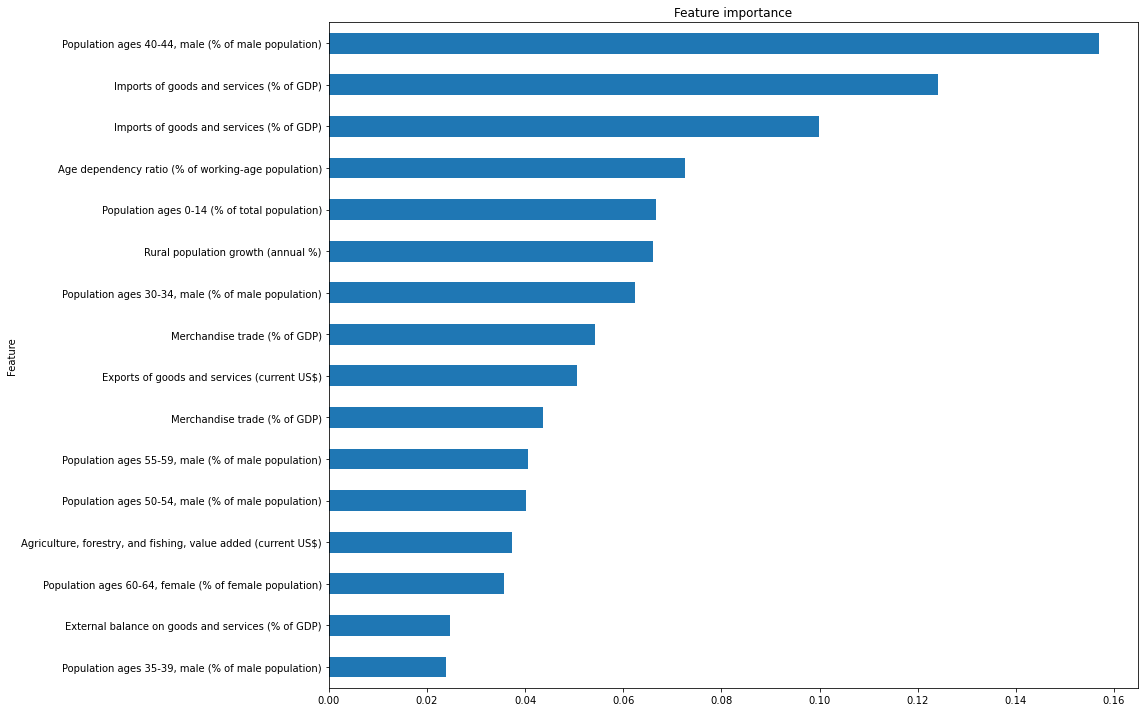

In [66]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(reg.feature_importances_, index=X.columns)

fig, ax = plt.subplots(figsize=(16, 10))
feature_importances.sort_values(ascending=True).plot.barh(ax=ax)
ax.set_title("Feature importance")
ax.set_ylabel("Feature")
fig.tight_layout()

### Cross Validation

In [67]:
from sklearn.model_selection import cross_validate

X2 = StandardScaler().fit_transform(X)
reg = ExtraTreesRegressor(min_samples_leaf=1,n_estimators=138, criterion='mae', random_state=7)

scoring = ["r2", "neg_mean_squared_error"]
scores = cross_validate(reg, np.array(X2), np.array(y).ravel(), cv=5, scoring=scoring)
scores

{'fit_time': array([0.12555885, 0.11463022, 0.10987973, 0.11459446, 0.11372209]),
 'score_time': array([0.0067203 , 0.00587201, 0.00593758, 0.00603032, 0.00624323]),
 'test_r2': array([ -0.37062393, -25.01335452,  -0.8856116 ,  -3.67898696,
         -1.42223267]),
 'test_neg_mean_squared_error': array([-1.31098808e+15, -9.45595842e+16, -4.70811742e+17, -2.12899690e+18,
        -1.32924765e+17])}

In [68]:
from sklearn.model_selection import cross_val_score

X2 = StandardScaler().fit_transform(X)
reg = ExtraTreesRegressor(min_samples_leaf=1,n_estimators=142, criterion='mae', random_state=0)

scores = cross_val_score(reg, X2, y, cv=5, scoring='r2')
scores

array([ -1.1410532 , -22.09607563,  -0.71401196,  -3.66255335,
        -1.39852343])

### GridSearch para KNeighborsRegressor

In [69]:
splits = ms.train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = splits

pipe = Pipeline([("scaler", StandardScaler()), ("knnr", KNeighborsRegressor())]) 
parameters1 = {'knnr__n_neighbors': np.arange(2,20),
               'knnr__weights': ['uniform', 'distance']}

knnr_grid2 = GridSearchCV(pipe, parameters1,  scoring='r2')   
knnr_grid2.fit(X_train, y_train)

print("Melhor valor de K para 'n_neighbors': {0}".format(knnr_grid2.best_params_['knnr__n_neighbors']))
print("Melhor valor para peso: {0}".format(knnr_grid2.best_params_['knnr__weights']))
print('Melhor r2: {0}'.format(knnr_grid2.best_score_))

Melhor valor de K para 'n_neighbors': 5
Melhor valor para peso: distance
Melhor r2: 0.767411048999679


- Teste do modelo utilizando os parâmetros encontrados

In [70]:
scaler = StandardScaler()
scaler_previsores = scaler.fit(X_train)
X_train = scaler_previsores.transform(X_train)
X_test = scaler_previsores.transform(X_test)

reg = KNeighborsRegressor(n_neighbors=2, weights='distance').fit(X_train, y_train)

expected = np.array(y_test)
predicted = reg.predict(X_test)

r2 = r2_score(predicted, expected)
print(f"> R2 Score: {r2}")

> R2 Score: 0.8543128065639466
